# **Data Manipulation and Visualization - Travel**
*Progetto di Veronica Crisafio*

### Obiettivo: Trovare strategie per un eco-hotel in base all'analisi di due dataset relativi a degli hotel in diversi stati americani

**Passaggi:**
1. Caricare i dataset
2. Pulire i dati
3. Analizzare il rating medio per stato
4. Estrarre parole chiave dalle recensioni
5. Concludere con strategie utili

---
## 1️⃣ Caricamento dei Dati

In [269]:
import pandas as pd

# Caricare il dataset principale
df1 = pd.read_csv('https://query.data.world/s/vla3gfx7vtdghafbuyqltsywredr2m')

# Mostrare le prime righe del dataset
df1.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to the Water Bus. restaurants etc. Hotel was comfortable breakfast was good - quite a variety. Room aircon didn't work very well. Take mosquito repelant!,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top floor and were surprised by a Jacuzzi bath we didn't know we were getting! Staff were friendly and helpful and the included breakfast was great! Great location and great value for money. Didn't want to leave!,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyget var att vi fick ett rum under taksarna dr det endast var full sthjd i 80 av rummets yta.,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,"We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.",������ ���������������,NaN,sungchul,NaN


In [4]:
#Carico il secondo dataset
df2 = pd.read_csv('https://query.data.world/s/m4kpip7vzmopnjqbxcwkqzhit6tmi2')

# Mostrare le prime righe
df2.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


In [6]:
# Controlliamo le colonne comuni tra i due dataset
common_cols = set(df1.columns).intersection(set(df2.columns))
print("Colonne in comune tra i due dataset:", common_cols)

# Verifichiamo se ci sono valori nulli nelle colonne chiave
print("\nValori nulli in df1:")
print(df1[['address', 'city', 'province']].isnull().sum())

print("\nValori nulli in df2:")
print(df2[['address', 'city', 'province']].isnull().sum())

Colonne in comune tra i due dataset: {'reviews.text', 'reviews.date', 'address', 'province', 'name', 'reviews.userCity', 'reviews.rating', 'postalCode', 'reviews.userProvince', 'reviews.title', 'city', 'latitude', 'longitude', 'reviews.username', 'country', 'categories'}

Valori nulli in df1:
address     0
city        0
province    0
dtype: int64

Valori nulli in df2:
address     0
city        0
province    0
dtype: int64


In [8]:
# Unione dei due dataset usando address, city, country e province
df_merged = pd.merge(df1, df2, on=['address', 'city', 'country', 'province'], how='outer', suffixes=('_df1', '_df2'))

# Controlliamo la dimensione del dataset risultante
print("Numero di righe dopo la merge:", df_merged.shape)

# Visualizziamo le prime righe per verificare il merge
df_merged.head()

Numero di righe dopo la merge: (48268, 40)


,address,categories_df1,city,country,latitude_df1,longitude_df1,name_df1,postalCode_df1,province,reviews.date_df1,...,reviews.dateSeen,reviews.rating_df2,reviews.sourceURLs,reviews.text_df2,reviews.title_df2,reviews.userCity_df2,reviews.userProvince_df2,reviews.username_df2,sourceURLs,websites
0,1 Bennett St,NaN,Cambridge,US,NaN,NaN,NaN,NaN,MA,NaN,...,2016-07-25T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g6089...,The location is great. The room had some very ...,Clean and comfortable,Fryeburg,NaN,mrodge_232707,https://www.trip.com/cambridge-ma/hotels/charl...,"http://www.charleshotel.com,http://www.henriet..."
1,1 Bennett St,NaN,Cambridge,US,NaN,NaN,NaN,NaN,MA,NaN,...,2016-07-25T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g6089...,I stayed at the hotel while attending the Harv...,Comfortable and Friendly,Sherman Oaks,NaN,levi564,https://www.trip.com/cambridge-ma/hotels/charl...,"http://www.charleshotel.com,http://www.henriet..."
2,1 Bennett St,NaN,Cambridge,US,NaN,NaN,NaN,NaN,MA,NaN,...,2015-10-23T00:00:00Z,5.0,http://www.tripadvisor.com/Hotel_Review-g60890...,I'm a Cambridge native. It used to be (during ...,Best Place to Stay in Cambridge,NaN,NaN,Stephen S,https://www.trip.com/cambridge-ma/hotels/charl...,"http://www.charleshotel.com,http://www.henriet..."
3,1 Bennett St,NaN,Cambridge,US,NaN,NaN,NaN,NaN,MA,NaN,...,2017-07-14T00:00:00Z,2.0,http://tripadvisor.com/Hotel_Review-g60890-d21...,Nice property and rooms but the service was aw...,Expected More,New York City,NewYork,54malac,https://www.trip.com/cambridge-ma/hotels/charl...,"http://www.charleshotel.com,http://www.henriet..."
4,1 Bennett St,NaN,Cambridge,US,NaN,NaN,NaN,NaN,MA,NaN,...,2015-10-23T00:00:00Z,5.0,http://www.tripadvisor.com/Hotel_Review-g60890...,I spent 10 days here in May - my third visit. ...,Third visit - still great,NaN,NaN,FredS3124,https://www.trip.com/cambridge-ma/hotels/charl...,"http://www.charleshotel.com,http://www.henriet..."


## 2️⃣ Pulizia dei dati

In [11]:
!pip install matplotlib seaborn numpy nltk spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.4/634.4 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.4/779.4 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 72.6 MB/s eta 0:00:00


Numero di righe e colonne: (48268, 40)

Tipi di dati delle colonne:
address                      object
categories_df1               object
city                         object
country                      object
latitude_df1                float64
longitude_df1               float64
name_df1                     object
postalCode_df1               object
province                     object
reviews.date_df1             object
reviews.dateAdded            object
reviews.doRecommend         float64
reviews.id                  float64
reviews.rating_df1          float64
reviews.text_df1             object
reviews.title_df1            object
reviews.userCity_df1         object
reviews.username_df1         object
reviews.userProvince_df1     object
id                           object
dateAdded                    object
dateUpdated                  object
categories_df2               object
primaryCategories            object
keys                         object
latitude_df2                floa

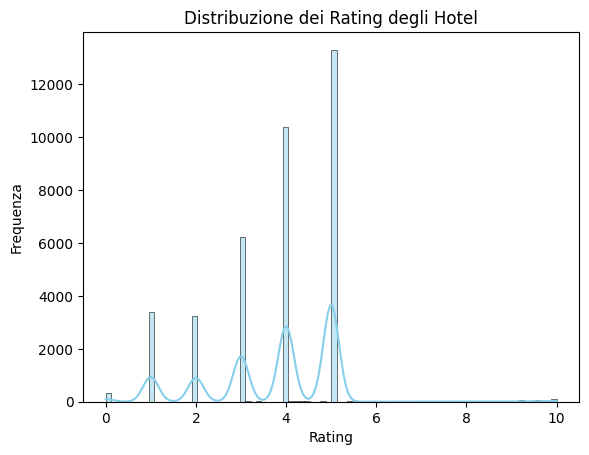


Distribuzione delle categorie degli hotel:
categories
Hotels                                                                                                                                                                                                                  20944
Hotels,Hotel                                                                                                                                                                                                             4874
Hotel,Hotels                                                                                                                                                                                                             1795
Hotels Hotels,Hotel                                                                                                                                                                                                       912
Hotel,Hotels Corporate Lodging,Hotels,Motels,Hotels Motel

In [13]:
# 1. Informazioni generali sul dataset
print("Numero di righe e colonne:", df_merged.shape)
print("\nTipi di dati delle colonne:")
print(df_merged.dtypes)

# 2. Statistiche descrittive (per le colonne numeriche)
print("\nStatistiche descrittive del dataset:")
print(df_merged.describe())

# 3. Analisi della distribuzione del rating
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuzione del rating (consideriamo il rating da df1 o df2, scegliamo il più completo)
sns.histplot(df_merged['reviews.rating_df1'].dropna(), kde=True, color='skyblue')
plt.title('Distribuzione dei Rating degli Hotel')
plt.xlabel('Rating')
plt.ylabel('Frequenza')
plt.show()

# Creiamo una nuova colonna unendo le categorie dei due dataset
df_merged['categories'] = df_merged['categories_df1'].fillna('') + ' ' + df_merged['categories_df2'].fillna('')

# Rimuoviamo eventuali spazi extra tra le categorie
df_merged['categories'] = df_merged['categories'].str.strip()

# 4. Analisi della distribuzione delle categorie
print("\nDistribuzione delle categorie degli hotel:")
print(df_merged['categories'].value_counts().head(10))  # Le prime 10 categorie più comuni

# 5. Verifica dei valori nulli
print("\nValori nulli nel dataset:")
print(df_merged.isnull().sum())

***Da questa prima analisi posso notare delle colonne duplicate, delle colonne come 'reviews.doRecommend' e 'reviews.id' che non servono in quanto non mi danno nessun valore utile, che il rating medio ha valori da 0 a 5, di conseguenza vorrei unificare le colonne duplicate eliminando i valori nulli, eliminare le colonne che non servono, ed eliminare le righe con rating nulli.***

In [16]:
# Mostriamo i nomi delle colonne per verificare eventuali colonne duplicate
print("Colonne nel dataset unito:")
print(df_merged.columns)

Colonne nel dataset unito:
Index(['address', 'categories_df1', 'city', 'country', 'latitude_df1',
       'longitude_df1', 'name_df1', 'postalCode_df1', 'province',
       'reviews.date_df1', 'reviews.dateAdded', 'reviews.doRecommend',
       'reviews.id', 'reviews.rating_df1', 'reviews.text_df1',
       'reviews.title_df1', 'reviews.userCity_df1', 'reviews.username_df1',
       'reviews.userProvince_df1', 'id', 'dateAdded', 'dateUpdated',
       'categories_df2', 'primaryCategories', 'keys', 'latitude_df2',
       'longitude_df2', 'name_df2', 'postalCode_df2', 'reviews.date_df2',
       'reviews.dateSeen', 'reviews.rating_df2', 'reviews.sourceURLs',
       'reviews.text_df2', 'reviews.title_df2', 'reviews.userCity_df2',
       'reviews.userProvince_df2', 'reviews.username_df2', 'sourceURLs',
       'websites', 'categories'],
      dtype='object')


In [18]:
# Unificazione delle colonne duplicate
df_merged['name'] = df_merged['name_df1'].combine_first(df_merged['name_df2'])
df_merged['latitude'] = df_merged['latitude_df1'].combine_first(df_merged['latitude_df2'])
df_merged['longitude'] = df_merged['longitude_df1'].combine_first(df_merged['longitude_df2'])
df_merged['postalCode'] = df_merged['postalCode_df1'].combine_first(df_merged['postalCode_df2'])
df_merged['reviews.date'] = df_merged['reviews.date_df1'].combine_first(df_merged['reviews.date_df2'])
df_merged['reviews.rating'] = df_merged['reviews.rating_df1'].combine_first(df_merged['reviews.rating_df2'])
df_merged['reviews.text'] = df_merged['reviews.text_df1'].combine_first(df_merged['reviews.text_df2'])
df_merged['reviews.title'] = df_merged['reviews.title_df1'].combine_first(df_merged['reviews.title_df2'])
df_merged['reviews.userCity'] = df_merged['reviews.userCity_df1'].combine_first(df_merged['reviews.userCity_df2'])
df_merged['reviews.userProvince'] = df_merged['reviews.userProvince_df1'].combine_first(df_merged['reviews.userProvince_df2'])
df_merged['reviews.username'] = df_merged['reviews.username_df1'].combine_first(df_merged['reviews.username_df2'])

# Eliminazione delle vecchie colonne
cols_to_drop = [
    'name_df1', 'name_df2', 'latitude_df1', 'latitude_df2', 'longitude_df1', 'longitude_df2',
    'postalCode_df1', 'postalCode_df2', 'reviews.date_df1', 'reviews.date_df2', 'reviews.rating_df1', 'reviews.rating_df2',
    'reviews.text_df1', 'reviews.text_df2', 'reviews.title_df1', 'reviews.title_df2',
    'reviews.userCity_df1', 'reviews.userCity_df2', 'reviews.userProvince_df1', 'reviews.userProvince_df2',
    'reviews.username_df1', 'reviews.username_df2'
]
df_merged.drop(columns=cols_to_drop, inplace=True)

# Verifica del risultato
print(df_merged.columns)

Index(['address', 'categories_df1', 'city', 'country', 'province',
       'reviews.dateAdded', 'reviews.doRecommend', 'reviews.id', 'id',
       'dateAdded', 'dateUpdated', 'categories_df2', 'primaryCategories',
       'keys', 'reviews.dateSeen', 'reviews.sourceURLs', 'sourceURLs',
       'websites', 'categories', 'name', 'latitude', 'longitude', 'postalCode',
       'reviews.date', 'reviews.rating', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username'],
      dtype='object')


In [22]:
df_merged.head()

,address,categories_df1,city,country,province,reviews.dateAdded,reviews.doRecommend,reviews.id,id,dateAdded,...,latitude,longitude,postalCode,reviews.date,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,1 Bennett St,NaN,Cambridge,US,MA,NaN,NaN,NaN,AVwdhhvR_7pvs4fz6u8C,2016-05-10T00:34:29Z,...,42.372406,-71.12297,2138,2016-07-03T00:00:00Z,5.0,The location is great. The room had some very ...,Clean and comfortable,Fryeburg,NaN,mrodge_232707
1,1 Bennett St,NaN,Cambridge,US,MA,NaN,NaN,NaN,AVwdhhvR_7pvs4fz6u8C,2016-05-10T00:34:29Z,...,42.372406,-71.12297,2138,2016-07-18T00:00:00Z,5.0,I stayed at the hotel while attending the Harv...,Comfortable and Friendly,Sherman Oaks,NaN,levi564
2,1 Bennett St,NaN,Cambridge,US,MA,NaN,NaN,NaN,AVwdhhvR_7pvs4fz6u8C,2016-05-10T00:34:29Z,...,42.372406,-71.12297,2138,2015-05-14T00:00:00Z,5.0,I'm a Cambridge native. It used to be (during ...,Best Place to Stay in Cambridge,NaN,NaN,Stephen S
3,1 Bennett St,NaN,Cambridge,US,MA,NaN,NaN,NaN,AVwdhhvR_7pvs4fz6u8C,2016-05-10T00:34:29Z,...,42.372406,-71.12297,2138,2017-07-13T00:00:00.000Z,2.0,Nice property and rooms but the service was aw...,Expected More,New York City,NewYork,54malac
4,1 Bennett St,NaN,Cambridge,US,MA,NaN,NaN,NaN,AVwdhhvR_7pvs4fz6u8C,2016-05-10T00:34:29Z,...,42.372406,-71.12297,2138,2015-07-07T00:00:00Z,5.0,I spent 10 days here in May - my third visit. ...,Third visit - still great,NaN,NaN,FredS3124


In [32]:
#Ho eliminato ulteriori colonne, quindi rivisualizzo le colonne rimanenti

print(df_merged.columns)


Index(['address', 'categories_df1', 'city', 'country', 'province', 'dateAdded',
       'dateUpdated', 'keys', 'websites', 'categories', 'name', 'latitude',
       'longitude', 'postalCode', 'reviews.date', 'reviews.rating',
       'reviews.text', 'reviews.title'],
      dtype='object')


In [34]:
colonne_da_eliminare = ['keys', 'categories_df1']

# Elimina le colonne
df_merged = df_merged.drop(columns=colonne_da_eliminare)

# Visualizza le prime righe per verificare che le colonne siano state eliminate
df_merged.head()

,address,city,country,province,dateAdded,dateUpdated,websites,categories,name,latitude,longitude,postalCode,reviews.date,reviews.rating,reviews.text,reviews.title
0,1 Bennett St,Cambridge,US,MA,2016-05-10T00:34:29Z,2018-06-04T23:54:17Z,"http://www.charleshotel.com,http://www.henriet...","Budget Hotels,Hotels and motels,Breakfast & Br...",The Charles Hotel,42.372406,-71.12297,2138,2016-07-03T00:00:00Z,5.0,The location is great. The room had some very ...,Clean and comfortable
1,1 Bennett St,Cambridge,US,MA,2016-05-10T00:34:29Z,2018-06-04T23:54:17Z,"http://www.charleshotel.com,http://www.henriet...","Budget Hotels,Hotels and motels,Breakfast & Br...",The Charles Hotel,42.372406,-71.12297,2138,2016-07-18T00:00:00Z,5.0,I stayed at the hotel while attending the Harv...,Comfortable and Friendly
2,1 Bennett St,Cambridge,US,MA,2016-05-10T00:34:29Z,2018-06-04T23:54:17Z,"http://www.charleshotel.com,http://www.henriet...","Budget Hotels,Hotels and motels,Breakfast & Br...",The Charles Hotel,42.372406,-71.12297,2138,2015-05-14T00:00:00Z,5.0,I'm a Cambridge native. It used to be (during ...,Best Place to Stay in Cambridge
3,1 Bennett St,Cambridge,US,MA,2016-05-10T00:34:29Z,2018-06-04T23:54:17Z,"http://www.charleshotel.com,http://www.henriet...","Budget Hotels,Hotels and motels,Breakfast & Br...",The Charles Hotel,42.372406,-71.12297,2138,2017-07-13T00:00:00.000Z,2.0,Nice property and rooms but the service was aw...,Expected More
4,1 Bennett St,Cambridge,US,MA,2016-05-10T00:34:29Z,2018-06-04T23:54:17Z,"http://www.charleshotel.com,http://www.henriet...","Budget Hotels,Hotels and motels,Breakfast & Br...",The Charles Hotel,42.372406,-71.12297,2138,2015-07-07T00:00:00Z,5.0,I spent 10 days here in May - my third visit. ...,Third visit - still great


In [36]:
print(df_merged.columns)

Index(['address', 'city', 'country', 'province', 'dateAdded', 'dateUpdated',
       'websites', 'categories', 'name', 'latitude', 'longitude', 'postalCode',
       'reviews.date', 'reviews.rating', 'reviews.text', 'reviews.title'],
      dtype='object')


In [38]:
# Numero di righe e colonne
print("Numero di righe e colonne:", df_merged.shape)

# Tipi di dati di ogni colonna
print("Tipi di dati delle colonne:", df_merged.dtypes)

Numero di righe e colonne: (48268, 16)
Tipi di dati delle colonne: address            object
city               object
country            object
province           object
dateAdded          object
dateUpdated        object
websites           object
categories         object
name               object
latitude          float64
longitude         float64
postalCode         object
reviews.date       object
reviews.rating    float64
reviews.text       object
reviews.title      object
dtype: object


## 3️⃣ Analizzare il rating medio per stato

In [41]:
# Raggruppa i dati per provincia e calcola la media del rating
province_rating = df_merged.groupby('province')['reviews.rating'].mean()

# Ordina i risultati in ordine decrescente
province_rating_sorted = province_rating.sort_values(ascending=False)

# Stampa i risultati
print(province_rating_sorted)

province
OR              5.027267
Chumstick       5.000000
Greens Bayou    5.000000
Matoaca         5.000000
Wingate         5.000000
                  ...   
So Portland          NaN
St Robert            NaN
Sunshine             NaN
Yankee Hill          NaN
Young Ward           NaN
Name: reviews.rating, Length: 287, dtype: float64


***Innanzitutto vorrei eliminare i valori senza il rating***

In [54]:
# Elimina le righe dove 'reviews.rating' è NaN
df_merged_clean = df_merged.dropna(subset=['reviews.rating'])

# Raggruppa i dati per provincia e calcola la media del rating
province_rating = df_merged_clean.groupby('province')['reviews.rating'].mean()

# Ordina i risultati in ordine decrescente
province_rating_sorted = province_rating.sort_values(ascending=False)

# Stampa i risultati
print(province_rating_sorted)

province
OR                5.027267
Chumstick         5.000000
Greens Bayou      5.000000
Matoaca           5.000000
Wingate           5.000000
                    ...   
South Bowie       0.000000
South Mountain    0.000000
Collier Twp       0.000000
Clearwater Lk     0.000000
Loch Raven        0.000000
Name: reviews.rating, Length: 256, dtype: float64


***Qui mi rendo conto che ci sono degli stati che non riconosco e quindi prima di procedere con il calcolo preferisco analizzare la colonna province, per dare un senso a quello che sarà il grafico***

In [57]:
# Visualizzare le province uniche
unique_provinces = df_merged['province'].unique()
print(f"Province uniche: {unique_provinces}")

# Contare la frequenza di ciascuna provincia
province_counts = df_merged['province'].value_counts(dropna=False)
print(f"\nFrequenza delle province:\n{province_counts}")

# Contare il numero di NaN nella colonna 'province'
nan_count = df_merged['province'].isna().sum()
print(f"\nNumero di valori NaN in 'province': {nan_count}")

# Visualizzare le prime righe della colonna 'province' per una rapida occhiata
print(f"\nPrime righe della colonna 'province':")
print(df_merged['province'].head())

Province uniche: ['MA' 'SC' 'FL' 'MT' 'PA' 'NV' 'Okaloosa Island' 'Pawleys Isl' 'CA' 'MI'
 'NJ' 'MD' 'TN' 'NY' 'OR' 'MN' 'Dardenne Prairie' 'KY' 'ME' 'IA'
 'Bellefountain' 'WA' 'Pgh' 'OH' 'WY' 'TX' 'WI' 'LA' 'Ela' 'Hollywood'
 'KS' 'GA' 'NC' 'Fairholm' 'DE' 'AR' 'Lakeway' 'Burl' 'NE' 'IL' 'OK' 'SD'
 'Lauderdale' 'NM' 'Wm Penn Anx W' 'AZ' 'IN' 'Lk Lotawana' 'Bateman'
 'Sumach' 'WV' 'ND' 'UT' 'St Robert' 'CO' 'AL' 'NH' 'Cuthbert' 'Rehoboth'
 'Tuttle' 'Hawthorne' 'Estes' 'MO' 'VA' 'Pine Haven' 'Niwot'
 'Cutler Ridge' 'MS' 'Sisquoc' 'Pontotoc' 'Gray' 'Burr Oak' 'Lardo'
 'Calhoun' 'AK' 'South Mountain' 'Bunker Hill Village' 'ID' 'VT' 'Atl'
 'Woodbury' 'Mystic' 'Collier Twp' 'Barrontown' 'Mar Vista' 'Westminster'
 'Scanlon' 'Evans' 'Stow' 'Round Peak' 'G P O' 'Lco Commercial Cent'
 'Hutton' 'HI' 'Lake Eufaula' 'Port Everglades' 'Manor Ridge' 'Schoeneck'
 'Yarmouth' 'Plantation' 'Fairview Hts' 'Presidio Of Monterey' 'Claude'
 'Hessdale' 'Meeham' 'Boggsville' 'Enterprise' 'Wmsbg' 'Concordia La

***Decido di sostituire alcune province non standard come 'Nyc' con valori corretti, ad esempio 'NY',filtrare solo gli stati validi (quelli presenti nel set us_states) e creare una nuova colonna ('province_clean') che rappresenti la provincia (cioè gli stati americani) pulita.***

In [59]:
# Set di stati USA + DC e Puerto Rico
us_states = set(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
                 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
                 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
                 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
                 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 
                 'DC', 'PR'])

# Sostituire valori specifici, come 'Nyc' con 'NY'
df_merged['province_clean'] = df_merged['province'].replace({'Nyc': 'NY'})

# Filtrare solo gli stati validi, mettendo None per quelli non validi
df_merged['province_clean'] = df_merged['province_clean'].apply(lambda x: x if x in us_states else None)

# Controllare i valori unici dopo la pulizia
print(f"Province uniche dopo la pulizia: {df_merged['province_clean'].unique()}")

# Contare la frequenza delle province pulite
province_counts_cleaned = df_merged['province_clean'].value_counts(dropna=False)
print(f"\nFrequenza delle province pulite:\n{province_counts_cleaned}")

# Controllare la presenza di NaN (se ci sono province non valide)
nan_count_cleaned = df_merged['province_clean'].isna().sum()
print(f"\nNumero di valori NaN in 'province_clean': {nan_count_cleaned}")

Province uniche dopo la pulizia: ['MA' 'SC' 'FL' 'MT' 'PA' 'NV' None 'CA' 'MI' 'NJ' 'MD' 'TN' 'NY' 'OR'
 'MN' 'KY' 'ME' 'IA' 'WA' 'OH' 'WY' 'TX' 'WI' 'LA' 'KS' 'GA' 'NC' 'DE'
 'AR' 'NE' 'IL' 'OK' 'SD' 'NM' 'AZ' 'IN' 'WV' 'ND' 'UT' 'CO' 'AL' 'NH'
 'MO' 'VA' 'MS' 'AK' 'ID' 'VT' 'HI' 'CT' 'DC' 'RI' 'PR']

Frequenza delle province pulite:
province_clean
None    7305
CA      4912
VA      4355
FL      2304
PA      2160
TX      2128
NY      1815
GA      1514
MI      1362
MD      1272
OH      1173
IL      1076
NV      1021
CO       981
MA       953
LA       936
SC       918
WA       796
IN       792
OR       763
TN       759
WI       664
IA       615
MO       589
NC       522
AZ       497
MS       475
MN       466
ME       457
NJ       447
KY       400
AR       391
MT       382
AL       371
OK       347
HI       338
UT       275
CT       221
NE       193
ID       191
SD       171
WY       170
NH       164
NM       158
KS       143
AK        67
DE        59
WV        56
PR        55
DC        3

In [62]:
df_merged.head ()

,address,city,country,province,dateAdded,dateUpdated,websites,categories,name,latitude,longitude,postalCode,reviews.date,reviews.rating,reviews.text,reviews.title,province_clean
0,1 Bennett St,Cambridge,US,MA,2016-05-10T00:34:29Z,2018-06-04T23:54:17Z,"http://www.charleshotel.com,http://www.henriet...","Budget Hotels,Hotels and motels,Breakfast & Br...",The Charles Hotel,42.372406,-71.12297,2138,2016-07-03T00:00:00Z,5.0,The location is great. The room had some very ...,Clean and comfortable,MA
1,1 Bennett St,Cambridge,US,MA,2016-05-10T00:34:29Z,2018-06-04T23:54:17Z,"http://www.charleshotel.com,http://www.henriet...","Budget Hotels,Hotels and motels,Breakfast & Br...",The Charles Hotel,42.372406,-71.12297,2138,2016-07-18T00:00:00Z,5.0,I stayed at the hotel while attending the Harv...,Comfortable and Friendly,MA
2,1 Bennett St,Cambridge,US,MA,2016-05-10T00:34:29Z,2018-06-04T23:54:17Z,"http://www.charleshotel.com,http://www.henriet...","Budget Hotels,Hotels and motels,Breakfast & Br...",The Charles Hotel,42.372406,-71.12297,2138,2015-05-14T00:00:00Z,5.0,I'm a Cambridge native. It used to be (during ...,Best Place to Stay in Cambridge,MA
3,1 Bennett St,Cambridge,US,MA,2016-05-10T00:34:29Z,2018-06-04T23:54:17Z,"http://www.charleshotel.com,http://www.henriet...","Budget Hotels,Hotels and motels,Breakfast & Br...",The Charles Hotel,42.372406,-71.12297,2138,2017-07-13T00:00:00.000Z,2.0,Nice property and rooms but the service was aw...,Expected More,MA
4,1 Bennett St,Cambridge,US,MA,2016-05-10T00:34:29Z,2018-06-04T23:54:17Z,"http://www.charleshotel.com,http://www.henriet...","Budget Hotels,Hotels and motels,Breakfast & Br...",The Charles Hotel,42.372406,-71.12297,2138,2015-07-07T00:00:00Z,5.0,I spent 10 days here in May - my third visit. ...,Third visit - still great,MA


***Abbiamo molti valori NaN nelle province, ma non voglio eliminare le righe con i valori nan in province perchè potrebbero servirmi in futuro per l'analisi delle recensioni, per ora vado a calcolare il rating per stato ignorando le province NaN***

In [65]:
# Calcolare la media del rating per stato, escludendo i valori None
state_rating = df_merged[df_merged['province_clean'].notna()].groupby('province_clean')['reviews.rating'].mean()

# Ordinare i risultati in ordine decrescente
state_rating_sorted = state_rating.sort_values(ascending=False)

# Visualizzare i risultati
print(state_rating_sorted)

province_clean
OR    5.027267
RI    4.666667
UT    4.465455
NH    4.451220
CT    4.352941
ID    4.342105
AK    4.194030
PR    4.181818
HI    4.146154
NM    4.110390
NJ    4.109620
MO    4.075768
VA    4.058864
IL    4.051333
AL    4.040872
KY    4.000000
GA    3.967268
WA    3.955203
AR    3.940874
MI    3.932695
VT    3.928571
WI    3.926066
FL    3.897781
MD    3.878635
PA    3.870594
LA    3.867550
TN    3.864096
CO    3.861026
OK    3.849275
MS    3.847890
AZ    3.838384
MA    3.824234
CA    3.805879
NC    3.776587
NV    3.754065
ME    3.710066
DC    3.684211
WV    3.678571
NE    3.673575
OH    3.665927
MT    3.595801
KS    3.557971
SC    3.504950
IA    3.448333
SD    3.382353
TX    3.365709
IN    3.359642
NY    3.358084
ND    3.343750
MN    3.331897
WY    3.217647
DE    3.203390
Name: reviews.rating, dtype: float64


***Vado a rappresentare con dei grafici i dati, mostrando l'utilizzo sia di Matplotlib che Seaborn***

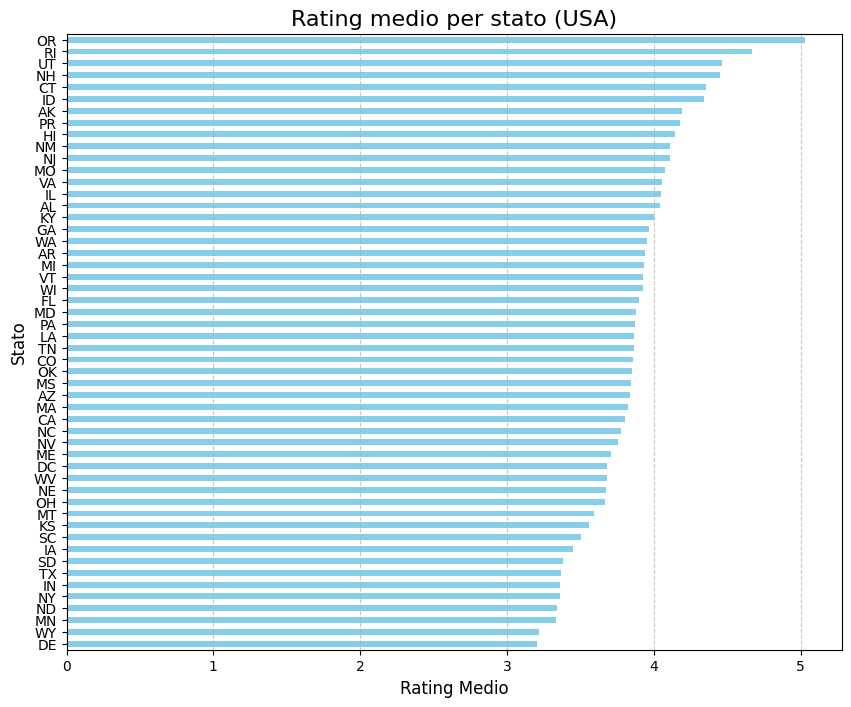

In [79]:
import matplotlib.pyplot as plt

# Calcolare la media del rating per stato, escludendo i valori None
state_rating = df_merged[df_merged['province_clean'].notna()].groupby('province_clean')['reviews.rating'].mean()

# Ordinare i risultati in ordine decrescente
state_rating_sorted = state_rating.sort_values(ascending=True)

# Creare il grafico a barre orizzontali con Matplotlib
plt.figure(figsize=(10, 8))
state_rating_sorted.plot(kind='barh', color='skyblue')
plt.title('Rating medio per stato (USA)', fontsize=16)
plt.xlabel('Rating Medio', fontsize=12)
plt.ylabel('Stato', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


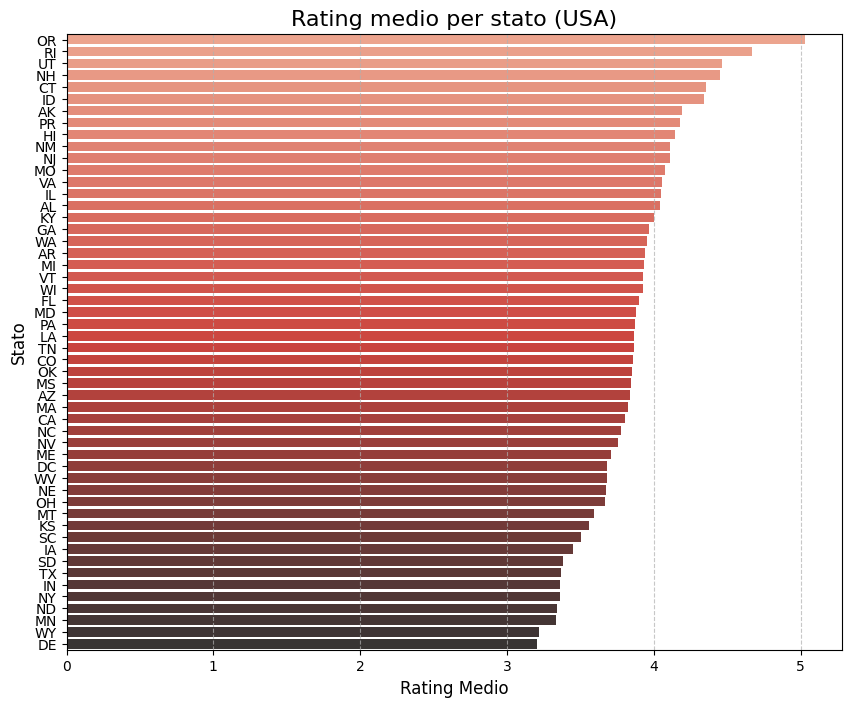

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creare un dataframe ordinato per Seaborn
state_rating_sorted_df = state_rating_sorted.reset_index()

# Creare il grafico a barre orizzontali con Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='reviews.rating', y='province_clean', data=state_rating_sorted_df, palette='Reds_d', hue='province_clean')
plt.title('Rating medio per stato (USA)', fontsize=16)
plt.xlabel('Rating Medio', fontsize=12)
plt.ylabel('Stato', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend([],[], frameon=False)  # Rimuove la legenda (opzionale, se non serve)
plt.show()



### Da questi dati possiamo fare alcune osservazioni:

Stati con **le recensioni più alte:**

Gli stati con i rating più alti (recensioni medie vicino a 5) sono in gran parte:
Oregon (OR) che ha il rating più alto, seguito da altri stati come Rhode Island (RI) e Utah (UT).

Questi stati hanno rating medi di 5, indicando che le recensioni per queste aree sono molto positive.

Stati con **le recensioni più basse:**

Gli stati con le recensioni più basse, tendenti verso valori più bassi di 3 o addirittura sotto media, sono:
DE - Delaware, WY - Wyoming, MN - Minnesota


Questi stati hanno una media di rating inferiore rispetto agli altri, suggerendo recensioni meno favorevoli da parte degli utenti.

In generale, si nota che gli stati con rating più elevati sono concentrati in alcune aree, mentre altre aree hanno recensioni più basse, il che potrebbe riflettere la qualità del servizio, l'esperienza degli utenti o altre variabili che influenzano la soddisfazione. Ed ecco perchè lo step successivo sarà quello di analizzare le recensioni così da poter capire meglio quali sono i criteri positivi e negativi più frequenti

## 4️⃣ Estrarre parole chiave dalle recensioni

**Obiettivo:** Capire quali parole o argomenti sono più associati a recensioni con rating alti o bassi.

Cosa farò:

1. Pulire il testo delle recensioni

2. Estrarre parole chiave in base al rating

3. Approfondire il tema dell'ecosostenibilità

#### **1.Pulizia del testo (Preprocessing)**

1a. Capire quante lingue vengono utilizzate, essendo molti ospiti provenienti da tutto il mondo, e capire se utilizzare solo quelle in inglese oppure provare a tradurle

1b. Rimuovere caratteri speciali alle recensioni filtrate

1c. Convertire tutto in minuscolo per rendere tutto consistente

1d. Rimuovere stopwords (es. "the", "and", "is" in inglese, per facilizzare l'analisi delle parole chiave)

1e. Lemmatizzazione (ridurre le parole alla loro forma base, es. "running" diventerebbe "run")

In [89]:
!pip install langdetect

  Using cached langdetect-1.0.9.tar.gz (981 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993284 sha256=46fee4de03cb5685b2301177c9ca3acf0ac0b3f998831704b6755619eaeb1532
  Stored in directory: /Users/veronica/Library/Caches/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [91]:
from langdetect import detect

# Funzione per rilevare la lingua di una recensione
def detect_language(text):
    try:
        return detect(text)  # Rileva la lingua
    except:
        return "unknown"  # Se non rilevabile, assegna "unknown"

# Applicare la funzione alle recensioni
df_merged["language"] = df_merged["reviews.text"].apply(detect_language)

# Contare le lingue presenti
df_merged["language"].value_counts()

language
en         45811
fr           479
es           338
de           277
af           180
so           166
it           137
pt           125
da           100
no            98
nl            85
sv            64
unknown       62
ca            55
ro            46
tl            31
fi            30
bn            27
cs            25
cy            22
et            16
pl            15
sl            12
tr            11
id             9
ja             9
sw             8
vi             7
sk             6
hr             5
ru             4
sq             3
lt             2
ko             2
zh-cn          1
Name: count, dtype: int64

**Prima di procedere con la traduzione di alcune recensioni , preferisco salvare il Dataset in caso di blocco del kernel.**

In [94]:
df_merged.to_csv("backup_df_merged.csv", index=False)

**Provo a tradurre solo un campione casuale di recensioni non in inglese, per integrarlo alle recensioni in inglese e far sì che l'analisi sia più imparziale**

In [100]:
!pip install --upgrade --no-cache-dir googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17456 sha256=f3bce0e55d4cc3b5a79df7806bf26d1b4c2f59f1486762e16154572b81079418
  Stored in directory: /private/var/folders/_0/mht1nxnj3qgcw272d8k4fjq80000gn/T/pip-ephem-wheel-cache-56be6ulr/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [104]:
from googletrans import Translator

# Inizializzo il traduttore
translator = Translator()

# Filtro solo le recensioni non in inglese
df_non_english = df_merged[df_merged["language"] != "en"]

# Seleziono un campione casuale di 20 recensioni
sample_size = 20  # Posso modificare questo valore per avere meno o più traduzioni ma non vorrei sovraccaricare il kernel
df_sample = df_non_english.sample(n=sample_size, random_state=42)

# Funzione per tradurre il testo in inglese
def translate_to_english(text, src_lang):
    try:
        translated = translator.translate(text, src=src_lang, dest='en')
        return translated.text
    except Exception as e:
        return text  # Se c'è un errore, restituisce il testo originale

# Applico la funzione di traduzione solo al campione
df_sample["translated_text"] = df_sample.apply(lambda row: translate_to_english(row["reviews.text"], row["language"]), axis=1)

# Aggiorno il DataFrame originale con le recensioni tradotte
df_merged.update(df_sample[["translated_text"]])

# Verifico alcune traduzioni
print(df_sample[["reviews.text", "translated_text"]].head())


                                            reviews.text  \
23768         xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx   
26348                             decent spot for lunch.   
45115  Zimmer, gross geräumig mit Terrasse, Aber die ...   
28739                          nice roomsflat screen tvs   
32911  agradable y econ��mica. Sugiero que se fumigue...   

                                         translated_text  
23768  XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...  
26348                             decent spot for lunch.  
45115  Room, big spacious with terrace, but the peopl...  
28739                         Nice Rooms flat screen TVs  
32911  Nice and economical.I suggest that the suite i...  


***Posso notare che alcune traduzioni sono state effettuate mentre altre hanno dei caratteri non leggibili,intanto mi accerto delle colonne della tabella aggiornata e cerco di filtrare solo le recensioni in inglese per continuare la pulizia***

In [112]:
print(df_merged.columns)

Index(['address', 'city', 'country', 'province', 'dateAdded', 'dateUpdated',
       'websites', 'categories', 'name', 'latitude', 'longitude', 'postalCode',
       'reviews.date', 'reviews.rating', 'reviews.text', 'reviews.title',
       'province_clean', 'language'],
      dtype='object')


In [119]:
# Visualizzare le prime 30 righe della tabella 
print(df_merged["reviews.text"].head(30))

0     The location is great. The room had some very ...
1     I stayed at the hotel while attending the Harv...
2     I'm a Cambridge native. It used to be (during ...
3     Nice property and rooms but the service was aw...
4     I spent 10 days here in May - my third visit. ...
5     We spent one night in Cambridge and the Charle...
6     We stay here every time we're in Cambridge. It...
7     Stayed at the Charles Hotel over Christmas / N...
8     Room was comfortable with a lovely view and we...
9     I have been to the Charles several times over ...
10    Great hotel with great proximity to Cambridge ...
11    Had a great time at our friend and mentor's 90...
12    We had a standard room at The Charles Hotel, b...
13    Fun time and very relaxing. Breakfast was pret...
14    We only stayed one night, but everything was g...
15    This was our first stay at this hotel though w...
16    Stay was overall wonderful. Bathrooms could us...
17    Stayed only one night as a walk in. Beauti

In [121]:
# Filtrare solo le recensioni in inglese
df_english_reviews = df_merged[df_merged['language'] == 'en']
print(df_english_reviews['reviews.text'].head())

0    The location is great. The room had some very ...
1    I stayed at the hotel while attending the Harv...
2    I'm a Cambridge native. It used to be (during ...
3    Nice property and rooms but the service was aw...
4    I spent 10 days here in May - my third visit. ...
Name: reviews.text, dtype: object


**1b. Rimuovere caratteri speciali alle recensioni filtrate, mantenendo i numeri che potrebbero essere utili nelle recensioni degli hotel**

In [128]:
import re

# Funzione per rimuovere caratteri speciali mantenendo i numeri
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Mantieni lettere e numeri, rimuovi altri caratteri speciali
    return text

In [132]:
# Applicare la funzione alle recensioni in inglese
df_english_reviews.loc[:, 'cleaned_reviews'] = df_english_reviews['reviews.text'].apply(remove_special_characters)

# Visualizzare le prime righe delle recensioni pulite
print(df_english_reviews['cleaned_reviews'].head())

0    The location is great The room had some very n...
1    I stayed at the hotel while attending the Harv...
2    Im a Cambridge native It used to be during the...
3    Nice property and rooms but the service was aw...
4    I spent 10 days here in May  my third visit I ...
Name: cleaned_reviews, dtype: object


**1c. Convertire tutto in minuscolo**

In [138]:
# Convertire tutto in minuscolo
df_english_reviews.loc[:, 'cleaned_reviews'] = df_english_reviews['cleaned_reviews'].apply(lambda x: x.lower())

# Visualizzare le prime righe
print(df_english_reviews['cleaned_reviews'].head())


0    the location is great the room had some very n...
1    i stayed at the hotel while attending the harv...
2    im a cambridge native it used to be during the...
3    nice property and rooms but the service was aw...
4    i spent 10 days here in may  my third visit i ...
Name: cleaned_reviews, dtype: object


**1d. Rimuovere stopwords (es. "the", "and", "is" in inglese, per facilizzare l'analisi delle parole chiave). Per rimuovere le stopwords, possiamo utilizzare una lista di stopwords predefinita da NLTK (Natural Language Toolkit), che è una libreria utile per l'elaborazione del linguaggio naturale.**

In [143]:
!pip install nltk

In [145]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Recupera la lista di stopwords in inglese
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/veronica/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [149]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/veronica/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [274]:
from nltk.tokenize import word_tokenize

# Funzione per rimuovere le stopwords
def remove_stopwords(text):
    # Tokenizzare il testo
    words = word_tokenize(text)
    # Rimuovere le stopwords
    filtered_words = [word for word in words if word not in stop_words]
    # Rimettere insieme le parole filtrate
    return ' '.join(filtered_words)

# Applicare la funzione alle recensioni pulite
df_english_reviews.loc[:, 'cleaned_reviews'] = df_english_reviews['cleaned_reviews'].apply(remove_stopwords)

# Visualizzare le prime righe
print(df_english_reviews['cleaned_reviews'].head())


0       location great room nice touches bose wave radio ability open window bit nice views marble bathroom tv built mirror good selection snacks drinks purchase room hotel spotless staff friendly helpful would highly recommend stay
1                                                         stayed hotel attending harvard lev program room luxurious spacious comforts needed busy week wifi little inconsistent challenging would definitely stay next time im cambridge
2    im cambridge native used 1950s working class people lived next academics professionals cambridge small town feel affordable everyone thats longer case charles hotel pricey much less grand places cambridge especially get package
3                                                                                  nice property rooms service awful hard get attention front desk multiple requests needed get issues resolved big hotel doesnt customer service needed
4                    spent 10 days may third visit great room lookin

In [155]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/veronica/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**1e. Lemmatizzazione: La lemmatizzazione è il processo di riduzione delle parole alle loro forme base (lemmi). Per esempio, "running" diventa "run" e "better" diventa "good". Questo aiuta a normalizzare il testo per un'analisi più precisa.
In NLTK, posso usare la funzione WordNetLemmatizer per eseguire la lemmatizzazione.**

In [276]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Inizializza il lemmatizer
lemmatizer = WordNetLemmatizer()

# Funzione per lemmatizzare il testo
def lemmatize_text(text):
    # Tokenizzare il testo
    words = word_tokenize(text)
    # Lemmatizzare ogni parola
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Applicare la lemmatizzazione alle recensioni
df_english_reviews = df_english_reviews.copy()
df_english_reviews['lemmatized_reviews'] = df_english_reviews['cleaned_reviews'].apply(lemmatize_text)


# Visualizzare le prime righe
print(df_english_reviews['lemmatized_reviews'].head())


0         location great room nice touch bose wave radio ability open window bit nice view marble bathroom tv built mirror good selection snack drink purchase room hotel spotless staff friendly helpful would highly recommend stay
1                                                       stayed hotel attending harvard lev program room luxurious spacious comfort needed busy week wifi little inconsistent challenging would definitely stay next time im cambridge
2    im cambridge native used 1950s working class people lived next academic professional cambridge small town feel affordable everyone thats longer case charles hotel pricey much less grand place cambridge especially get package
3                                                                                  nice property room service awful hard get attention front desk multiple request needed get issue resolved big hotel doesnt customer service needed
4                     spent 10 day may third visit great room looking cambridge 

In [164]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/veronica/nltk_data...


True

In [181]:
df_english_reviews.to_csv("temp_reviews.csv", index=False)


***Noto come alcuni verbi sono ancora coniugati e non riportati alla base, ma provo comunque a valutare delle parole chiave in correlazione con il rating alto o basso degli hotel***

In [189]:
print(df_english_reviews.columns)


Index(['address', 'city', 'country', 'province', 'dateAdded', 'dateUpdated',
       'websites', 'categories', 'name', 'latitude', 'longitude', 'postalCode',
       'reviews.date', 'reviews.rating', 'reviews.text', 'reviews.title',
       'province_clean', 'language', 'cleaned_reviews', 'lemmatized_reviews'],
      dtype='object')


In [191]:
print(df_english_reviews.head())


        address       city country province             dateAdded  \
0  1 Bennett St  Cambridge      US       MA  2016-05-10T00:34:29Z   
1  1 Bennett St  Cambridge      US       MA  2016-05-10T00:34:29Z   
2  1 Bennett St  Cambridge      US       MA  2016-05-10T00:34:29Z   
3  1 Bennett St  Cambridge      US       MA  2016-05-10T00:34:29Z   
4  1 Bennett St  Cambridge      US       MA  2016-05-10T00:34:29Z   

            dateUpdated                                           websites  \
0  2018-06-04T23:54:17Z  http://www.charleshotel.com,http://www.henriet...   
1  2018-06-04T23:54:17Z  http://www.charleshotel.com,http://www.henriet...   
2  2018-06-04T23:54:17Z  http://www.charleshotel.com,http://www.henriet...   
3  2018-06-04T23:54:17Z  http://www.charleshotel.com,http://www.henriet...   
4  2018-06-04T23:54:17Z  http://www.charleshotel.com,http://www.henriet...   

                                          categories               name  \
0  Budget Hotels,Hotels and motels,Breakf

#### **2. Estrarre parole chiave in base al rating**

In [205]:
from collections import Counter

# Creiamo un dataset con recensioni positive e negative
positive_reviews = df_english_reviews[df_english_reviews['reviews.rating'] >= 4]
negative_reviews = df_english_reviews[df_english_reviews['reviews.rating'] <= 2]

# Tokenizzare direttamente le recensioni positive
positive_words = []
for review in positive_reviews['lemmatized_reviews']:
    positive_words.extend(review.split())

# Tokenizzare direttamente le recensioni negative
negative_words = []
for review in negative_reviews['lemmatized_reviews']:
    negative_words.extend(review.split())

# Conta le parole più frequenti nelle recensioni positive
positive_word_count = Counter(positive_words)
negative_word_count = Counter(negative_words)

# Mostrare le 20 parole più comuni nelle recensioni positive
print("Parole chiave per recensioni positive:")
for word, freq in positive_word_count.most_common(20):
    print(f"{word}: {freq}")

# Mostrare le 20 parole più comuni nelle recensioni negative
print("\nParole chiave per recensioni negative:")
for word, freq in negative_word_count.most_common(20):
    print(f"{word}: {freq}")


Parole chiave per recensioni positive:
room: 20328
hotel: 17628
great: 11580
staff: 11272
stay: 11072
clean: 10297
nice: 8737
breakfast: 8621
good: 7941
friendly: 6431
comfortable: 5514
would: 4995
location: 4827
stayed: 4753
place: 4545
bed: 4528
night: 4392
time: 4118
area: 4100
helpful: 3880

Parole chiave per recensioni negative:
room: 8963
hotel: 4840
stay: 2396
bed: 2018
night: 1953
would: 1868
one: 1639
desk: 1547
staff: 1390
front: 1358
like: 1329
place: 1304
breakfast: 1272
u: 1259
dirty: 1230
didnt: 1227
get: 1203
door: 1191
clean: 1185
time: 1108


***Questa prima analisi ci può fornire spunti per l'organizzazione di un buon Eco-Hotel, seppur ancora l'analisi del testo non sia inerente al tema dell'ecosostenibilità possiamo già capire i punti importanti su cui l'hotel dovrebbe focalizzarsi:***

**1. Pulizia e Comfort:** La pulizia è un elemento fondamentale per i clienti (ad esempio clean è presente in entrambe le liste). Le recensioni sembrano anche suggerire che comfortable e great siano molto apprezzate. Quindi, l'eco-hotel dovrebbe prestare molta attenzione alla pulizia e alla creazione di spazi confortevoli, anche se si vuole mantenere una forte attenzione alla sostenibilità.

**2. Personale e Servizio:** Le parole come staff, friendly, helpful nelle recensioni positive suggeriscono che i clienti apprezzano un servizio cordiale e disponibile. Formare il personale per fornire un servizio eccellente e creare un ambiente accogliente potrebbe aumentare la soddisfazione.

**3. Infrastrutture e Accessibilità:** Nelle recensioni negative, parole come dirty, front e desk indicano che ci potrebbero essere problemi con la gestione della reception, l'accessibilità o la manutenzione delle camere. Questi potrebbero essere punti critici da migliorare per garantire che l'hotel sia visto come ben gestito e accogliente.

**4. Colazione e Ristorazione:** Breakfast appare spesso nelle recensioni sia positive che negative. Quindi, l'eco-hotel potrebbe concentrarsi su un'offerta di colazione sana, ecologica e biologica, che non solo soddisfi i clienti ma rispetti anche principi ecologici.

***Ma vorrei provare a fare un'analisi più approfondita riguardante il tema dell'ecosostenibilità***

#### **3.Approfondire il tema dell'ecosostenibilità**


In [219]:
# Lista di parole chiave legate all'ecosostenibilità
eco_keywords = [
    'sustainability', 'eco-friendly', 'green', 'renewable', 'recycling', 'solar', 
    'energy efficient', 'organic', 'carbon footprint', 'environmentally conscious', 
    'eco-conscious', 'green spaces', 'waste management', 'composting', 'clean energy', 
    'green building', 'water conservation', 'sustainable practices', 'eco-tourism'
]

# Funzione per verificare se una recensione contiene parole chiave ecologiche
def contains_eco_keywords(text):
    text = text.lower()  # Convertiamo tutto in minuscolo per uniformità
    for keyword in eco_keywords:
        if keyword in text:
            return True
    return False

# Filtrare le recensioni che contengono parole chiave ecologiche
eco_reviews = df_english_reviews[df_english_reviews['lemmatized_reviews'].apply(contains_eco_keywords)]

# Visualizzare le recensioni filtrate
print(eco_reviews[['reviews.text', 'reviews.rating', 'lemmatized_reviews']].head())


                                          reviews.text  reviews.rating  \
706  This was a great place for us to stay. We love...             5.0   
723  Very clean, quiet rooms. Excellent climate con...             5.0   
724  I spent one night in a room with a single king...             5.0   
727  Nice hotel. If you get a room on the river sid...             5.0   
730  I stay at this hotel frequently for seminars I...             4.0   

                                    lemmatized_reviews  
706  great place u stay loved hotel close shop rest...  
723  clean quiet room excellent climate control fri...  
724  spent one night room single king size bed room...  
727  nice hotel get room river side spectacular vie...  
730  stay hotel frequently seminar teach employee a...  


In [223]:
# Lista di parole chiave legate all'ecosostenibilità che vuoi cercare
eco_keywords = ['green', 'sustainable', 'waste', 'recycling', 'solar']

# Funzione aggiornata per cercare le parole chiave ecologiche
def contains_eco_keywords(text):
    text = text.lower()  # Convertiamo tutto in minuscolo
    for keyword in eco_keywords:
        if keyword in text:
            return True
    return False

# Filtriamo le recensioni che contengono parole chiave ecologiche
eco_reviews = df_english_reviews[df_english_reviews['lemmatized_reviews'].apply(contains_eco_keywords)]

# Visualizzare le recensioni ecologiche
print(eco_reviews[['reviews.text', 'reviews.rating', 'lemmatized_reviews']].head(50))


                                           reviews.text  reviews.rating  \
398   When we arrived pool was closed Due to an ACCI...             1.0   
706   This was a great place for us to stay. We love...             5.0   
723   Very clean, quiet rooms. Excellent climate con...             5.0   
724   I spent one night in a room with a single king...             5.0   
727   Nice hotel. If you get a room on the river sid...             5.0   
730   I stay at this hotel frequently for seminars I...             4.0   
731   I stay at the Kelly Inn in St. Cloud when I vi...             4.0   
732   Clean room, great river view, friendly front d...             5.0   
735   Stayed at the Best Western Plus Kelly Inn duri...             3.0   
744   We had a great stay at the Kelly Inn. Upon che...             5.0   
745   I stayed at this hotel during a tournament. Th...             5.0   
782   This is one of my favorites ever. Our room was...             5.0   
804   Was in business ove

In [225]:
# Modifica le opzioni di pandas per visualizzare più caratteri nelle celle
pd.set_option('display.max_colwidth', None)  # Imposta il limite di caratteri a None, per non troncare il testo

# Ora stampiamo le recensioni filtrate
print(eco_reviews[['reviews.text', 'reviews.rating', 'lemmatized_reviews']].head(20))


In [265]:
# Parole chiave per eco-hotel
eco_keywords = ['green', 'sustainable', 'recycling', 'solar', 'eco-friendly', 'environment', 
                'energy-efficient', 'carbon footprint', 'zero waste', 'sustainability', 'organic']

# Filtrare le recensioni che contengono almeno una di queste parole
eco_reviews = df_english_reviews[df_english_reviews['lemmatized_reviews'].str.contains('|'.join(eco_keywords), case=False, na=False)]

# Visualizzare le recensioni che contengono queste parole
print(eco_reviews[['reviews.text', 'reviews.rating', 'province_clean']].head(10))


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          reviews.text  \
39                                                                                                                                                                                                    We were so impressed with the entire environment of this awesome resort. It had everything for a relaxing weekend that a couple would want. We had some awesome meals at all the restaurants on property, enjoyed the fitness center and the Marilyn Monroe SPA, what else can a couple ask for.   
631  The Hotel is re

In [229]:
# Parole chiave per pannelli solari
solar_keywords = ['panel solar', 'solar panel']

# Filtrare le recensioni con pannelli solari
solar_reviews = df_english_reviews[df_english_reviews['lemmatized_reviews'].str.contains('|'.join(solar_keywords), case=False, na=False)]

# Visualizzare le recensioni
print(solar_reviews[['reviews.text', 'reviews.rating']].head(10))


Empty DataFrame
Columns: [reviews.text, reviews.rating]
Index: []


In [263]:
# Parole chiave per ecosostenibilità
eco_keywords = ['eco-friendly', 'sustainable', 'renewable', 'environmentally friendly']

# Filtrare le recensioni con le parole chiave ecologiche
eco_reviews = df_english_reviews[df_english_reviews['lemmatized_reviews'].str.contains('|'.join(eco_keywords), case=False, na=False)]

# Visualizzare le recensioni che contengono le parole chiave ecologiche
print(eco_reviews[['reviews.text', 'reviews.rating', 'province_clean']].head(10))


## 5️⃣ Concludere con strategie utili per un Eco-Hotel

Per concludere vorrei mostrare un grafico scatter, che ci permette di unire le parole legate all'ecosostenibilità, ai rating, e agli stati in America per capire dove potrebbe essere meglio fare l'eco-hotel e su cosa bisognerebbe focalizzarsi per fare un eco-hotel di successo.

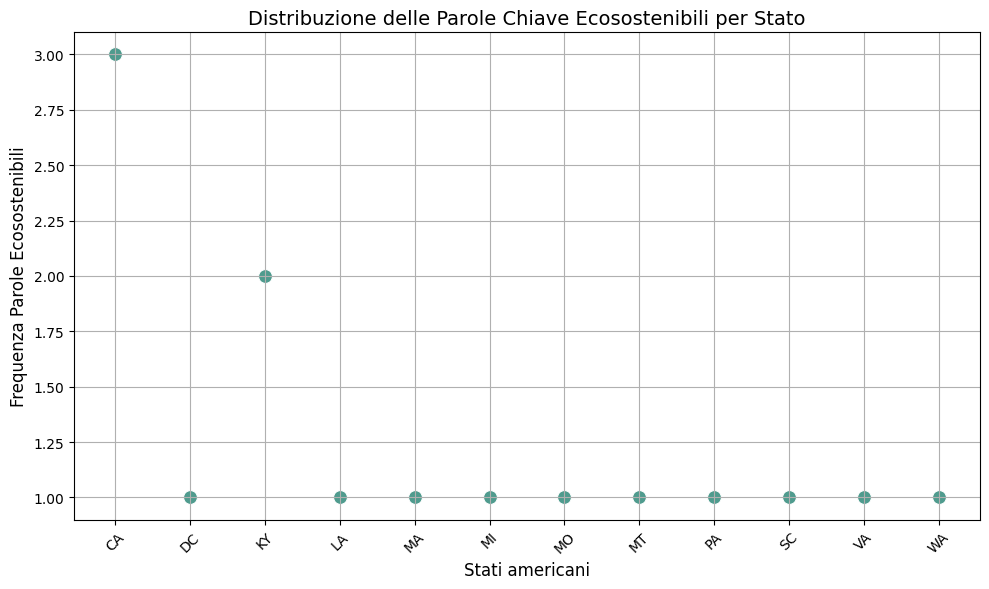

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt

# Parole chiave per ecosostenibilità
eco_keywords = [
    'sustainability', 'eco-friendly', 'renewable', 'recycling', 'solar', 
    'energy efficient', 'organic', 'carbon footprint', 'environmentally conscious', 
    'eco-conscious', 'green spaces', 'waste management', 'composting', 'clean energy', 
    'green building', 'water conservation', 'sustainable practices', 'eco-tourism'
]

# Filtrare le recensioni con le parole chiave ecologiche
eco_reviews = df_english_reviews[df_english_reviews['lemmatized_reviews'].str.contains('|'.join(eco_keywords), case=False, na=False)].copy()

# Conta le occorrenze delle parole chiave ecologiche per provincia
eco_reviews.loc[:, 'eco_count'] = eco_reviews['lemmatized_reviews'].apply(lambda x: sum([1 for keyword in eco_keywords if keyword in x]))

# Raggruppare per provincia pulita e sommare le occorrenze delle parole ecologiche
eco_by_province = eco_reviews.groupby('province_clean')['eco_count'].sum().reset_index()

# Visualizzare un grafico scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(data=eco_by_province, x='province_clean', y='eco_count', marker='o', s=100, color='#4F9B8E')

# Impostazioni del grafico
plt.title('Distribuzione delle Parole Chiave Ecosostenibili per Stato', fontsize=14)
plt.xlabel('Stati americani', fontsize=12)
plt.ylabel('Frequenza Parole Ecosostenibili', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Mostrare il grafico
plt.tight_layout()
plt.show()


Alla base di un **eco-hotel di successo** c'è la **sostenibilità**, che deve permeare ogni aspetto dell'operazione e dell'esperienza offerta agli ospiti. Analizzando le recensioni e i concetti emersi dalle parole chiave legate all'ecosostenibilità, possiamo identificare alcune aree chiave su cui un eco-hotel dovrebbe concentrarsi per migliorare il proprio rating e attrarre una clientela consapevole e interessata a pratiche sostenibili.

## 1. Gestione dei Rifiuti e Pulizia
Un tema ricorrente nelle recensioni riguarda **la gestione dei rifiuti** e l'**igiene**. Un eco-hotel che si rispetti dovrebbe quindi utilizzare metodi ecologici per la raccolta dei rifiuti, la riduzione dei consumi e l'uso di detergenti ecologici. Investire in un sistema di gestione dei rifiuti intelligente, come il **riciclaggio** e il **compostaggio**, potrebbe essere un punto di differenziazione importante.

## 2. Energia Rinnovabile e Comfort
Un altro aspetto fondamentale che emerge dalle recensioni riguarda l'**efficienza energetica**, e il confort derivante da un giusto **"climate control"** (controllo climatico). I **pannelli solari** sono un investimento chiave per un eco-hotel, poiché non solo riducono l'impatto ambientale, ma contribuiscono anche al comfort degli ospiti, garantendo temperature ottimali e riducendo i costi energetici. La disponibilità di energia solare potrebbe essere un elemento distintivo, molto apprezzato dalla clientela eco-consapevole.

## 3. Offerta Alimentare Sostenibile
La **sostenibilità alimentare** è un altro tema rilevante. Gli ospiti sono sempre più attenti alla qualità e alla provenienza del cibo, preferendo opzioni locali, biologiche e con un basso impatto ambientale. Offrire un menù con ingredienti freschi e di stagione, con una forte attenzione a pratiche agricole sostenibili, potrebbe essere un fattore decisivo per migliorare il rating dell'hotel.

## 4. Location Strategica: Doppio Approccio
Per quanto riguarda la **location**, due strategie possono essere adottate:

- **Concentrarsi su luoghi dove l'ecosostenibilità è già una priorità**. In questi casi, pur avendo una concorrenza maggiore, l’eco-hotel può sfruttare una domanda già consolidata per l'ecoturismo, integrando l'offerta con pratiche innovative e di alta qualità.
  
- **Investire in aree dove l'ecosostenibilità è ancora poco sviluppata**. Qui si può fare la differenza, introducendo un eco-hotel che diventa un pioniere in queste pratiche. L'incremento della consapevolezza e l'educazione dei clienti su tematiche ambientali potrebbero aiutare a sviluppare un mercato in crescita.

## 5. Dati e Analisi
Per affinare la strategia e comprendere meglio il settore, è fondamentale raccogliere **dati rilevanti** attraverso le recensioni e le interazioni con i clienti. Analizzare **parole chiave** nelle recensioni aiuta a comprendere cosa motiva i clienti a scegliere un hotel e quali sono gli aspetti più apprezzati. Bisogna fare comunque molta attenzione quando si analizzano le recensioni, poiché alcune parole chiave, come "green", potrebbero apparire frequentemente ma non sempre essere correlate ai temi di sostenibilità. Per esempio, la parola "green" è spesso apparsa in relazione al nome di un ristorante che non aveva molto a che fare con il tema dell'ecosostenibilità, distorcendo l'analisi e portando a risultati non pertinenti.

Inoltre, l'analisi dei dati relativi alla **localizzazione geografica** delle recensioni (ad esempio, capire quali stati hanno una maggiore attenzione verso l’ecosostenibilità, o gli stati con maggior rating positivo o negativo) può indirizzare le scelte di marketing e di posizionamento dell'hotel. Questi dati forniscono informazioni fondamentali per orientare le decisioni strategiche e per creare offerte mirate.
